# Cutting Semantic Corners!

This work interests various measures:
- Average word frequency
- Average word concreteness
- Average word depth in WordNet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from nltk.corpus import wordnet as wn

In [124]:
#We already have a processed file
address = "/Users/yuribizzoni/Downloads/ttr__lexdens_nouns_PLM.xlsx"
ttr_file  = pd.read_excel(address)
#ttr_file

In [125]:
len(ttr_file["ORG_WR_EN_lem"])

2640

In [278]:
#ttr_file

In [4]:
#Concreteness - we use a dictionary
eng_co = pd.read_excel("/Users/yuribizzoni/Downloads/Translation/B7/tools/Concreteness_ratings_Brysbaert_et_al_BRM.xlsx")

In [129]:
# column names
list(eng_co)
#eng_co

['Word',
 'Bigram',
 'Conc.M',
 'Conc.SD',
 'Unknown',
 'Total',
 'Percent_known',
 'SUBTLEX',
 'Dom_Pos']

In [6]:
#this dictionary contains almost 40000 different words
len(eng_co["Word"])

39954

In [131]:
#We make it into a dictionary of concreteness scores
subset = eng_co[['Word', 'Conc.M']]
conc_values = dict(subset.get_values())

In [144]:
## computing concreteness measures

categories = "ORG_WR_EN,TR_DE_EN,ORG_SP_EN,SI_DE_EN".split(",")

overlaps = []
fr_subsets = []

mean_concreteness_scores = []
mean_concreteness_scores_frequency = []
percen_very_concretes = []
percen_very_abstracts = []
con_fre_sco = []

c=0

for category in categories:
    print(category)
    subset_fr = ttr_file[[category+"_lem", "Anzahl_"+str(c)]]
    c+=1
    fr_values = dict(subset_fr.get_values())
    print(len(fr_values.keys()))
    fr_subsets.append((category,fr_values))
    
    prv, cons, fres = [],[], []
    very_con, very_abs = [],[]
    
    for w in fr_values.keys():
        if w in conc_values.keys():
            conc_score = conc_values[w]
            fre = fr_values[w]
            
            if fre>-1:
                # we add a word's conc. score proportionally to the number of times it occurs in the corpus
                # this allows us to perform a real t-test later on 
                prv+=[conc_score]*int(fre) 
                
                cons.append(conc_score)
                fres.append(fre)
            if conc_score>4: very_con.append(conc_score) # very concrete set (concreteness>4)
            if conc_score<2: very_abs.append(conc_score) # very abstract set (concreteness<2)
                
    print("Mean concreteness score: ",np.mean(cons), "Std concreteness score: ",np.std(cons))
    n_words = len(fr_values.keys())
    mean_concreteness_scores_frequency.append(np.mean(prv))
    mean_concreteness_scores.append(np.mean(cons))
    percen_very_concretes.append(len(very_con)/n_words)
    percen_very_abstracts.append(len(very_abs)/n_words)
    con_fre_sco.append(prv)
    print("\n")

ORG_WR_EN
2640
Mean concreteness score:  3.1641766858337688 Std concreteness score:  0.9715712099137087


TR_DE_EN
2263
Mean concreteness score:  3.1771540312876057 Std concreteness score:  0.9828211066405917


ORG_SP_EN
2292
Mean concreteness score:  3.2083173076923073 Std concreteness score:  0.9722201150976274


SI_DE_EN
2179
Mean concreteness score:  3.1879244031830236 Std concreteness score:  0.9754323000618517




In [139]:
for i in range(4):
    print(categories[i])
    print("Percentage very abstract words: "+str(percen_very_abstracts[i]))
    print("Percentage very concrete words: "+str(percen_very_concretes[i]))
    print("Mean type concreteness score: "+str(mean_concreteness_scores[i]))
    print("Mean token concreteness score: "+str(mean_concreteness_scores_frequency[i]))
    print("\n")

ORG_WR_EN
Percentage very abstract words: 0.08446969696969697
Percentage very concrete words: 0.16780303030303031
Mean type concreteness score: 3.1641766858337688
Mean token concreteness score: 3.1641766858337688


TR_DE_EN
Percentage very abstract words: 0.09147149801148917
Percentage very concrete words: 0.17454706142288998
Mean type concreteness score: 3.1771540312876057
Mean token concreteness score: 3.1771540312876057


ORG_SP_EN
Percentage very abstract words: 0.08464223385689354
Percentage very concrete words: 0.17713787085514834
Mean type concreteness score: 3.2083173076923073
Mean token concreteness score: 3.2083173076923073


SI_DE_EN
Percentage very abstract words: 0.08031206975676916
Percentage very concrete words: 0.1661312528682882
Mean type concreteness score: 3.1879244031830236
Mean token concreteness score: 3.1879244031830236




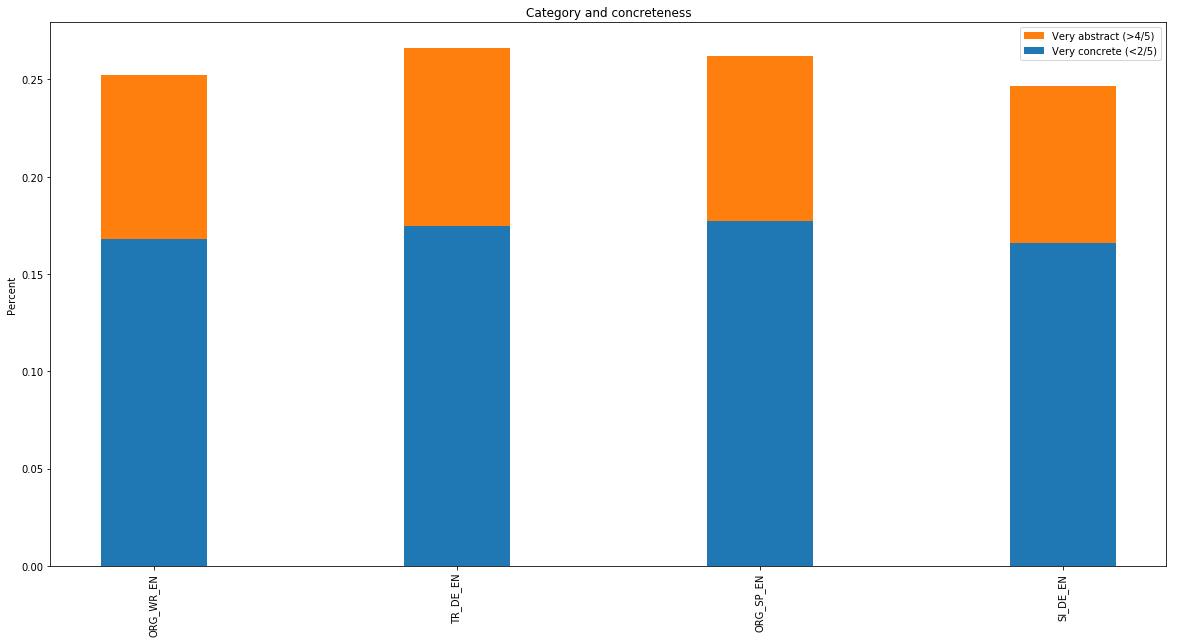

In [140]:

plt.figure(figsize=(20,10))

N = 4
OVERALL_BAR_WIDTH = .35
SENTIMENT_Y_LABEL2 = 'Percent'
SENTIMENT_TITLE2 = 'Category and concreteness'

abstra = [x for x in percen_very_abstracts]
concre = [x for x in percen_very_concretes]

labs = categories 
ind = np.arange(N)
width = OVERALL_BAR_WIDTH
#p2 = plt.bar(ind, neu, width)
p3 = plt.bar(ind, concre, width, bottom=0)
p1 = plt.bar(ind, abstra, width, bottom=concre)

plt.ylabel(SENTIMENT_Y_LABEL2)
plt.title(SENTIMENT_TITLE2)
plt.xticks(ind, labs, rotation='vertical')
#plt.legend((p1[0], p2[0], p3[0]), ('Negative', 'Neutral', 'Positive'))
plt.legend((p1[0], p3[0]), ('Very abstract (>4/5)', 'Very concrete (<2/5)'))
#plt.savefig("/Users/yuribizzoni/abstract_concrete_difference.png")
plt.show()

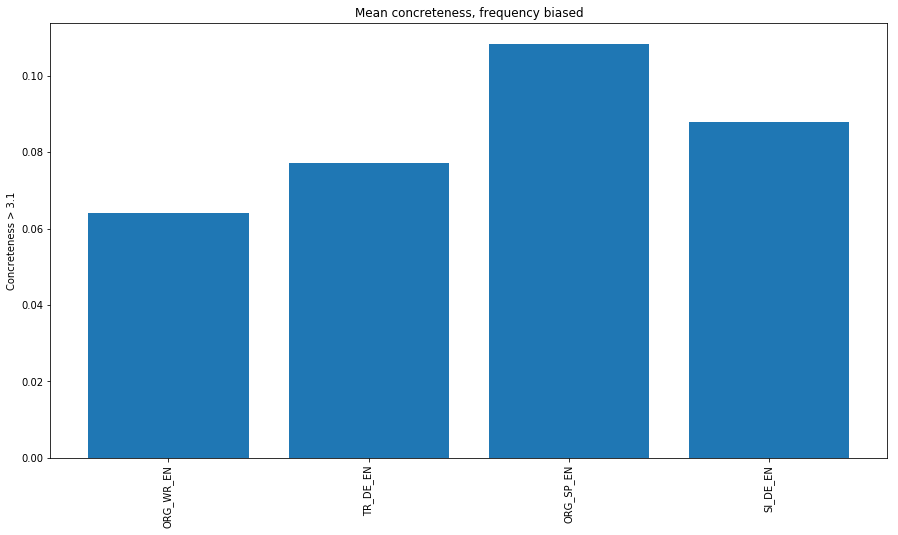

In [141]:
N = len(mean_concreteness_scores_frequency)

SENTIMENT_Y_LABEL2 = "Concreteness > 3.1"
SENTIMENT_TITLE2 = 'Mean concreteness, frequency biased'

plt.figure(figsize=(15,8))

plt.bar(np.arange(N), [x-3.1 for x in mean_concreteness_scores_frequency])
plt.ylabel(SENTIMENT_Y_LABEL2)
plt.title(SENTIMENT_TITLE2)
plt.xticks(ind, labs, rotation='vertical')
#plt.yticks(ticks=[.3,.35,.4])
#plt.savefig("/Users/yuribizzoni/mean_concreteness_freqbiased.png")
plt.show()

In [142]:
#Differences are small. Are they statistically significant?

In [145]:
#T test comparing each concreteness distribution with each other
#(p<.05 means statistically significant)

# con_fre_sco: concreteness frequency scores for each word in a category

for array in con_fre_sco:
    for other_array in con_fre_sco:
        if array != other_array:
            print(stats.ttest_ind(array, other_array))

Ttest_indResult(statistic=2.5858934323954887, pvalue=0.00971867236290266)
Ttest_indResult(statistic=-5.40086512567981, pvalue=6.701535161472225e-08)
Ttest_indResult(statistic=-1.8576631458426693, pvalue=0.06323049268285551)
Ttest_indResult(statistic=-2.5858934323954887, pvalue=0.00971867236290266)
Ttest_indResult(statistic=-7.873795064855583, pvalue=3.602587761676999e-15)
Ttest_indResult(statistic=-4.317246355925874, pvalue=1.5870165463073763e-05)
Ttest_indResult(statistic=5.40086512567981, pvalue=6.701535161472225e-08)
Ttest_indResult(statistic=7.873795064855583, pvalue=3.602587761676999e-15)
Ttest_indResult(statistic=3.3747578039349344, pvalue=0.0007402382795128507)
Ttest_indResult(statistic=1.8576631458426693, pvalue=0.06323049268285551)
Ttest_indResult(statistic=4.317246355925874, pvalue=1.5870165463073763e-05)
Ttest_indResult(statistic=-3.3747578039349344, pvalue=0.0007402382795128507)


In [16]:
#subset_fr

In [17]:
#Other analyses
#subset_fr

In [186]:
#High frequency vs low frequency words

hig_perces, low_perces = [],[]
hig_low_ratio = []

for category in categories:
    
    print(category)
    subset_fr = ttr_file[[category+"_lem", category+"_fre"]]
    fr_values = dict(subset_fr.get_values())
    high_counts = [v for v in fr_values.values() if v>=.85] # 
    all_counts = [v for v in fr_values.values() if v>-1]
    
    print("mean frequency", np.mean(all_counts))
    low_counts = [v for v in fr_values.values() if v<0.05] # 
    hig_per = len(high_counts)/len(all_counts)
    low_per =  len(low_counts)/len(all_counts)
    
    print("percentage low frequency words: ", low_per)
    
    print("percentage high frequency words: ", hig_per)
    hig_perces.append(hig_per)
    low_perces.append(low_per)
    high_low_r = len(high_counts)/len(low_counts)
    
    print("High to low frequency words ratio: ", high_low_r)
    hig_low_ratio.append(high_low_r)
    
    print("\n")

ORG_WR_EN
mean frequency 0.03788956190648574
percentage low frequency words:  0.8443181818181819
percentage high frequency words:  0.0026515151515151517
High to low frequency words ratio:  0.0031404217137729925


TR_DE_EN
mean frequency 0.04420866489832008
percentage low frequency words:  0.8099027409372237
percentage high frequency words:  0.0035366931918656055
High to low frequency words ratio:  0.004366812227074236


ORG_SP_EN
mean frequency 0.043753125532966605
percentage low frequency words:  0.8197293758184199
percentage high frequency words:  0.004801396769969445
High to low frequency words ratio:  0.005857294994675187


SI_DE_EN
mean frequency 0.045913682277318645
percentage low frequency words:  0.8099173553719008
percentage high frequency words:  0.0036730945821854912
High to low frequency words ratio:  0.0045351473922902496




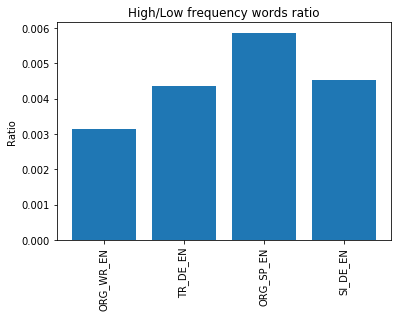

In [187]:
SENTIMENT_Y_LABEL2 = "Ratio"
SENTIMENT_TITLE2 = 'High/Low frequency words ratio'

plt.bar(np.arange(N), [x for x in hig_low_ratio])
plt.ylabel(SENTIMENT_Y_LABEL2)
plt.title(SENTIMENT_TITLE2)
plt.xticks(ind, labs, rotation='vertical')
#plt.savefig("/Users/yuribizzoni/frequency_ratio")

plt.show()

In [273]:
#WordNet


depth_of_frequents = []
depth_of_rares = []
avg_depth = []

depths_arrays = []


#extra = open("/Users/yuribizzoni/Downloads/B7/WN_depth_English.csv","w")

#extra.write("CORPUS\tWN_DEPTH\tWN_DEPTH_calibrated\tFREQUENCY\n")
c=0
for category in categories:
    
    subset_fr = ttr_file[[category+"_lem", category+"_fre"]]
    c+=1
    fr_values = dict(subset_fr.get_values())
    fr_subsets.append((category,fr_values))
    prv, frequents, rares = [],[],[]
    
    for w in fr_values.keys():
        w = str(w)
        syn = wn.synsets(w) # we take all synsets containing that word
        if len(syn)>0 and w!='nan':
            fre = fr_values[w] # frequency of the word
            # we take the mean depth of the synsets containing the word
            dep_ca = np.mean([s.max_depth() for s in syn][-1]) 
            tot = dep_ca 
            if fre>-1:
                # as before, we add a proportial number of scores
                # in order to compute a t-test later
                prv+=[tot]*int(fre*100) ###WE ARE USING MPF FREQ, so it is necessary to *100 or more
            if fre>=1:
                frequents+=[tot]*int(fre*100)
            if fre<.1:
                rares+=[tot]*int(fre*100)
    depths_arrays.append(frequents)
    avg_depth.append(np.mean(prv))
    depth_of_frequents.append(np.mean(frequents))
    depth_of_rares.append(np.mean(rares))

print("done")

done


In [274]:
syn[0].max_depth()

12

In [275]:
depth_of_frequents

[6.156424581005586, 5.780263157894737, 6.208917197452229, 4.965217391304348]

In [276]:
depth_of_rares

[5.081124241456403, 5.164818920916482, 4.752792256142963, 5.028368794326241]

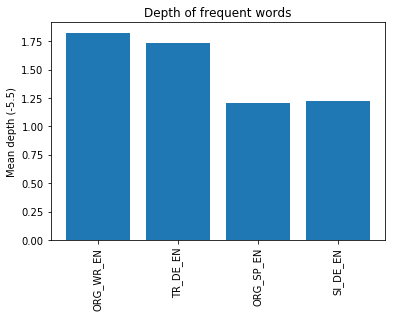

In [209]:
SENTIMENT_Y_LABEL2 = "Mean depth (-5.5)"
SENTIMENT_TITLE2 = 'Depth of frequent words'

plt.bar(np.arange(N), [(x-5.5) for x in depth_of_frequents])
plt.ylabel(SENTIMENT_Y_LABEL2)
plt.title(SENTIMENT_TITLE2)
plt.xticks(ind, labs, rotation='vertical')

#plt.savefig("/Users/yuribizzoni/depfreq.png", bbox_inches="tight")

plt.show()

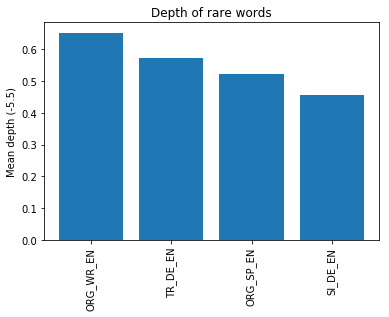

In [210]:
SENTIMENT_Y_LABEL2 = "Mean depth (-5.5)"
SENTIMENT_TITLE2 = 'Depth of rare words'

plt.bar(np.arange(N), [x-5.5 for x in depth_of_rares])
plt.ylabel(SENTIMENT_Y_LABEL2)
plt.title(SENTIMENT_TITLE2)
plt.xticks(ind, labs, rotation='vertical')

#plt.savefig("/Users/yuribizzoni/deprare.png", bbox_inches="tight")

plt.show()

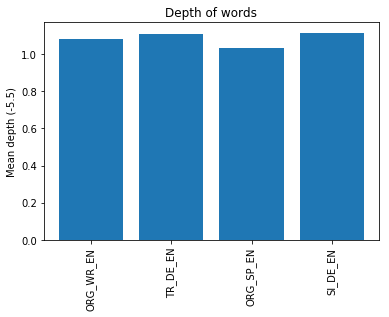

In [201]:
SENTIMENT_Y_LABEL2 = "Mean depth (-5.5)"
SENTIMENT_TITLE2 = 'Depth of words'

plt.bar(np.arange(N), [x-5 for x in avg_depth])
plt.ylabel(SENTIMENT_Y_LABEL2)
plt.title(SENTIMENT_TITLE2)
plt.xticks(ind, labs, rotation='vertical')
plt.show()

In [183]:
[1]

[1]

In [184]:
##t test. This time, some contrasts are significant, others are not. 
# Some are close to the threshold (e.g. .08), others are far away.

for i in range(len(depths_arrays)):
    array = depths_arrays[i]
    for j in range(len(depths_arrays)):
        other_array = depths_arrays[j]
        if array != other_array:
            ttest = stats.ttest_ind(array, other_array)
            print(labs[i], '->', labs[j], ttest)
            if ttest[1]<.05: print("<<< Significant\n")

ORG_WR_EN -> TR_DE_EN Ttest_indResult(statistic=0.6170087588775385, pvalue=0.537309673854139)
ORG_WR_EN -> ORG_SP_EN Ttest_indResult(statistic=3.0923567764303495, pvalue=0.0020124753820480587)
<<< Significant

ORG_WR_EN -> SI_DE_EN Ttest_indResult(statistic=4.309264201788192, pvalue=1.728453366777586e-05)
<<< Significant

TR_DE_EN -> ORG_WR_EN Ttest_indResult(statistic=-0.6170087588775385, pvalue=0.537309673854139)
TR_DE_EN -> ORG_SP_EN Ttest_indResult(statistic=2.1240650463060127, pvalue=0.03377746071300634)
<<< Significant

TR_DE_EN -> SI_DE_EN Ttest_indResult(statistic=3.4576196104220207, pvalue=0.0005570956906984508)
<<< Significant

ORG_SP_EN -> ORG_WR_EN Ttest_indResult(statistic=-3.0923567764303495, pvalue=0.0020124753820480587)
<<< Significant

ORG_SP_EN -> TR_DE_EN Ttest_indResult(statistic=-2.1240650463060127, pvalue=0.03377746071300634)
<<< Significant

ORG_SP_EN -> SI_DE_EN Ttest_indResult(statistic=2.086194654090014, pvalue=0.03707633853479759)
<<< Significant

SI_DE_EN ->

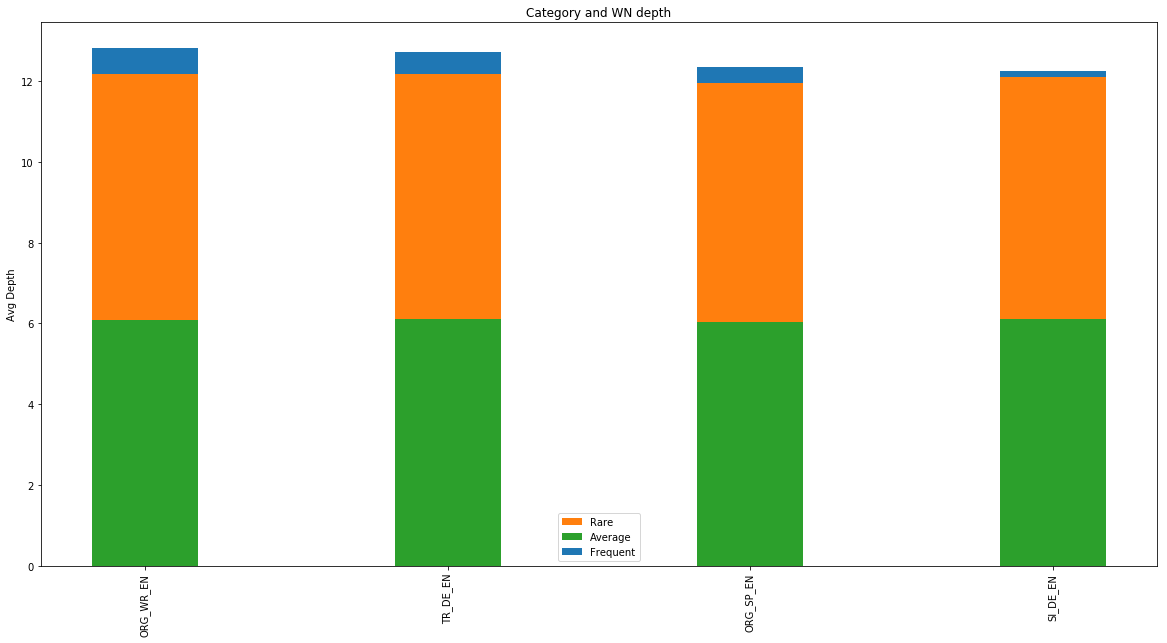

In [185]:
plt.figure(figsize=(20,10))

OVERALL_BAR_WIDTH = .35
SENTIMENT_Y_LABEL2 = 'Avg Depth'
SENTIMENT_TITLE2 = 'Category and WN depth'

N = len(depth_of_frequents)
avg = [x for x in avg_depth]
freq = [x for x in depth_of_frequents]
rare = [x for x in depth_of_rares]
labs = categories #sorted([x[0] for x in sent])
ind = np.arange(N)
width = OVERALL_BAR_WIDTH

p3 = plt.bar(ind, freq, width, bottom=rare)
p1 = plt.bar(ind, rare, width, bottom=avg)
p2 = plt.bar(ind, avg, width, bottom=0)


plt.ylabel(SENTIMENT_Y_LABEL2)
plt.title(SENTIMENT_TITLE2)
plt.xticks(ind, labs, rotation='vertical')
plt.legend((p1[0], p2[0], p3[0]), ('Rare', 'Average', 'Frequent'))
#plt.legend((p1[0], p3[0]), ('Very frequent (>.9)', 'Average'))
#plt.savefig("/Users/yuribizzoni/generality_per_frequency_class.png")
plt.show()

In [198]:
[round(x,3) for x in freq]

[6.714, 6.649, 6.45, 6.251]